## Nesse notebook preprocessamos o dataset integrado de diferentes formar e os salvamos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Datasets gerados com os diferentes preprocessamentos:

- clean_data: dataset sem valores nan e valores categoricos e padronização de dados
- clean_data_grouped: mesmo que clean_data, mas com valores com pouca frequencia agrupados

- clean_data_gender: mesmo que clean_data, mas com o valores nan do Gender removidos
- clean_data_alignment: mesmo que clean_data, mas com o valores nan do Alignment removidos
- clean_data_publisher: mesmo que clean_data, mas com o valores nan do Publisher removidos
- clean_data_grouped_gender: mesmo que clean_data_grouped, mas com o valores nan do Gender removidos
- clean_data__grouped_alignment: mesmo que clean_data_grouped, mas com o valores nan do Alignment removidos
- clean_data_grouped_publisher: mesmo que clean_data_grouped, mas com o valores nan do Publisher removidos

In [2]:
# Merged_data: Dados já integrados e valores "-99" e "-" tem valor NaN agora.
data = pd.read_csv("data/merged_data.csv")
data.head()

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Abraxas,Male,blue,Cosmic Entity,Black,NaN,Marvel Comics,NaN,bad,NaN,...,False,False,False,False,False,False,False,False,False,False


In [3]:
data.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('bool')], dtype=object)

In [4]:
# Selecionamos os objetos do dataset que são as caracteristicas categoricas dos personagens
data_objects = data.select_dtypes(include='O')
data_objects.head()

,hero_names,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment
0,A-Bomb,Male,yellow,Human,No Hair,Marvel Comics,NaN,good
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,Dark Horse Comics,blue,good
2,Abin Sur,Male,blue,Ungaran,No Hair,DC Comics,red,good
3,Abomination,Male,green,Human / Radiation,No Hair,Marvel Comics,NaN,bad
4,Abraxas,Male,blue,Cosmic Entity,Black,Marvel Comics,NaN,bad


In [5]:
data_objects.describe()

,hero_names,Gender,Eye color,Race,Hair color,Publisher,Skin color,Alignment
count,684,642,529,413,528,647,72,653
unique,667,2,22,60,29,24,16,3
top,Spider-Man,Male,blue,Human,Black,Marvel Comics,green,good
freq,3,464,208,195,151,341,21,435


In [6]:
data_objects.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 8 columns):
hero_names    684 non-null object
Gender        642 non-null object
Eye color     529 non-null object
Race          413 non-null object
Hair color    528 non-null object
Publisher     647 non-null object
Skin color    72 non-null object
Alignment     653 non-null object
dtypes: object(8)
memory usage: 42.8+ KB


In [7]:
#poucos dados em skin color, então foi removido dos dados originais
clean_data = data.drop('Skin color', axis=1)
'Skin color' in (clean_data.columns)

False

## Analisar objetos separadamente

### Gender

In [8]:
data_objects.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

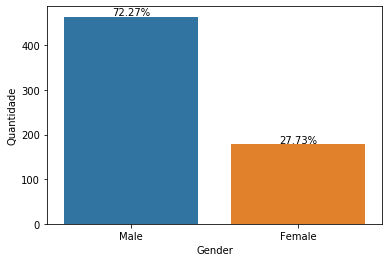

In [9]:
def barplot(x, data):
    ax = sns.countplot(x=x, data=data)
    total = data[x].count()
    ax.set(ylabel='Quantidade')
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format((height/total)*100),
                ha="center")
    plt.show()
barplot("Gender", data)

### Eye color

In [10]:
clean_data['Eye color'].unique()

array(['yellow', 'blue', 'green', 'brown', nan, 'red', 'violet', 'white',
       'purple', 'black', 'silver', 'yellow / red', 'grey',
       'yellow (without irises)', 'gold', 'blue / white', 'hazel',
       'green / blue', 'white / red', 'indigo', 'amber', 'yellow / blue',
       'bown'], dtype=object)

In [11]:
# valor bown substituido por brown
clean_data = clean_data.replace('bown', 'brown')
clean_data['Eye color'].unique()

array(['yellow', 'blue', 'green', 'brown', nan, 'red', 'violet', 'white',
       'purple', 'black', 'silver', 'yellow / red', 'grey',
       'yellow (without irises)', 'gold', 'blue / white', 'hazel',
       'green / blue', 'white / red', 'indigo', 'amber', 'yellow / blue'],
      dtype=object)

In [12]:
eye_count = clean_data["Eye color"].value_counts()
eye_count

blue                       208
brown                      120
green                       71
red                         43
black                       21
yellow                      19
white                       16
hazel                        6
grey                         5
purple                       4
gold                         3
amber                        2
yellow (without irises)      2
violet                       2
silver                       1
yellow / blue                1
indigo                       1
white / red                  1
yellow / red                 1
blue / white                 1
green / blue                 1
Name: Eye color, dtype: int64

In [13]:
eye_count[eye_count < 10].index

Index(['hazel', 'grey', 'purple', 'gold', 'amber', 'yellow (without irises)',
       'violet', 'silver', 'yellow / blue', 'indigo', 'white / red',
       'yellow / red', 'blue / white', 'green / blue'],
      dtype='object')

In [14]:
#Valores que aparecem menos de 10 vezes na coluna Eye Color são agrupados em um valor unico chamado outros
clean_data_grouped = clean_data.copy()
clean_data_grouped = clean_data_grouped.replace(eye_count[eye_count < 10].index, "outros")
clean_data_grouped['Eye color'].unique()

array(['yellow', 'blue', 'green', 'brown', nan, 'red', 'outros', 'white',
       'black'], dtype=object)

In [15]:
#Valores nan são substituidos pela moda da coluna
clean_data['Eye color'].fillna(clean_data['Eye color'].mode()[0], inplace=True)
clean_data_grouped['Eye color'].fillna(clean_data_grouped['Eye color'].mode()[0], inplace=True)

### Race

In [16]:
race_count = clean_data["Race"].value_counts()
race_count

Human                 195
Mutant                 62
God / Eternal          14
Cyborg                 11
Human / Radiation      11
Android                 9
Symbiote                8
Alien                   7
Kryptonian              7
Demon                   6
Atlantean               5
Asgardian               5
Alpha                   5
Inhuman                 4
Cosmic Entity           4
New God                 3
Animal                  3
Human / Altered         3
Frost Giant             2
Eternal                 2
Metahuman               2
Human / Cosmic          2
Amazon                  2
Saiyan                  2
Demi-God                2
Human-Kree              2
Vampire                 2
Martian                 1
Maiar                   1
Talokite                1
Dathomirian Zabrak      1
Luphomoid               1
Gungan                  1
Tamaranean              1
Bolovaxian              1
Kaiju                   1
Ungaran                 1
Human-Vulcan            1
Spartoi     

In [18]:
#Valores que aparecem menos de 15 vezes na coluna Race são agrupados em um valor unico chamado outros
clean_data_grouped = clean_data_grouped.replace(race_count[race_count < 15].index, "outros")
clean_data_grouped['Race'].unique()

array(['Human', 'outros', nan, 'Mutant'], dtype=object)

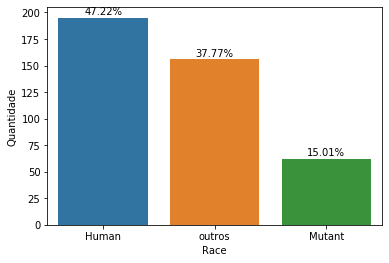

In [19]:
barplot('Race', clean_data_grouped)

In [20]:
#Valores nan são substituidos pela moda da coluna
clean_data['Race'].fillna(clean_data['Race'].mode()[0], inplace=True)
clean_data_grouped['Race'].fillna(clean_data_grouped['Race'].mode()[0], inplace=True)

### Hair color

In [21]:
hair_count = clean_data["Hair color"].value_counts()
hair_count

Black               151
Blond                88
Brown                82
No Hair              69
Red                  49
White                22
Auburn               13
Green                 8
Strawberry Blond      6
Purple                5
Brown / White         4
Grey                  4
Silver                4
Blue                  3
black                 3
blond                 3
Orange                2
Red / Orange          1
Red / Grey            1
Yellow                1
Red / White           1
Pink                  1
Brownn                1
Black / Blue          1
Magenta               1
Orange / White        1
Brown / Black         1
Gold                  1
Indigo                1
Name: Hair color, dtype: int64

In [22]:
#Erros de digitação corrigidos, 'Brownn', 'black', 'blond' agora são 'Brown', 'Black', 'Blond'.
clean_data = clean_data.replace(['Brownn', 'black', 'blond'], ['Brown', 'Black', 'Blond'])
clean_data_grouped = clean_data_grouped.replace(['Brownn', 'black', 'blond'], ['Brown', 'Black', 'Blond'])

In [23]:
#Valores que aparecem menos de 15 vezes na coluna Hair color são agrupados em um valor unico chamado outros
clean_data_grouped = clean_data_grouped.replace(hair_count[hair_count < 15].index, "outros")
clean_data_grouped['Hair color'].unique()

array(['No Hair', 'Black', 'Blond', 'Brown', nan, 'White', 'outros',
       'Red'], dtype=object)

In [24]:
#Valores nan são substituidos pela moda da coluna
clean_data['Hair color'].fillna(clean_data['Hair color'].mode()[0], inplace=True)
clean_data_grouped['Hair color'].fillna(clean_data_grouped['Hair color'].mode()[0], inplace=True)

### Publisher

In [25]:
publisher_count = clean_data["Publisher"].value_counts()
publisher_count

Marvel Comics        341
DC Comics            196
NBC - Heroes          18
Dark Horse Comics     18
Image Comics          14
George Lucas          13
Star Trek              6
SyFy                   5
Team Epic TV           5
ABC Studios            4
Shueisha               4
IDW Publishing         4
Icon Comics            4
HarperCollins          3
Wildstorm              3
J. K. Rowling          1
South Park             1
Universal Studios      1
Titan Books            1
Rebellion              1
Hanna-Barbera          1
J. R. R. Tolkien       1
Sony Pictures          1
Microsoft              1
Name: Publisher, dtype: int64

#### Valores que aparecem menos de 20 vezes na coluna Publisher são agrupados em um valor unico chamado outros para clean_data e clean_data_grouped

In [26]:
clean_data = clean_data.replace(publisher_count[publisher_count< 20].index, 'outros')
clean_data['Publisher'].unique()

array(['Marvel Comics', 'outros', 'DC Comics', nan], dtype=object)

In [27]:
clean_data_grouped = clean_data_grouped.replace(publisher_count[publisher_count< 20].index, 'outros')
clean_data_grouped['Publisher'].unique()

array(['Marvel Comics', 'outros', 'DC Comics', nan], dtype=object)

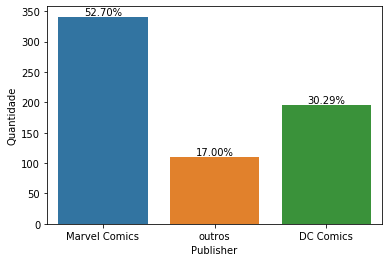

In [28]:
barplot('Publisher', clean_data)

### Alignment

In [29]:
alignment_count = clean_data["Alignment"].value_counts()
alignment_count

good       435
bad        194
neutral     24
Name: Alignment, dtype: int64

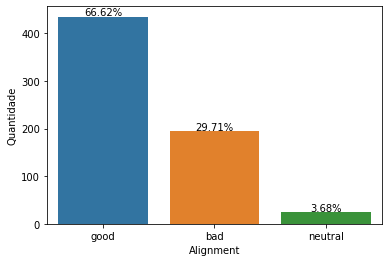

In [30]:
barplot('Alignment', clean_data)

## Dados numericos 

In [31]:
#selecionar valores numeros
data_float = clean_data.select_dtypes(include='float64')
data_float.head()

,Height,Weight
0,203.0,441.0
1,191.0,65.0
2,185.0,90.0
3,203.0,441.0
4,NaN,NaN


In [32]:
data_float.describe()

,Height,Weight
count,490.000000,468.000000
mean,187.237755,113.651709
std,60.576189,106.505504
min,15.200000,2.000000
25%,173.500000,61.000000
50%,183.000000,81.000000
75%,190.250000,106.500000
max,975.000000,900.000000


In [33]:
data_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 2 columns):
Height    490 non-null float64
Weight    468 non-null float64
dtypes: float64(2)
memory usage: 10.8 KB


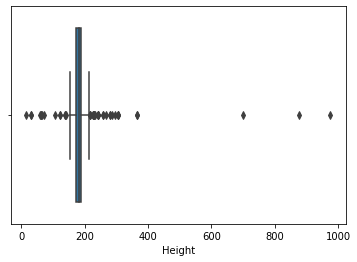

In [34]:
ax = sns.boxplot(x=clean_data["Height"])

In [35]:
# valores nan substituidos pela mediana
clean_data['Height'].fillna(clean_data['Height'].median(), inplace=True)
clean_data_grouped['Height'].fillna(clean_data_grouped['Height'].median(), inplace=True)

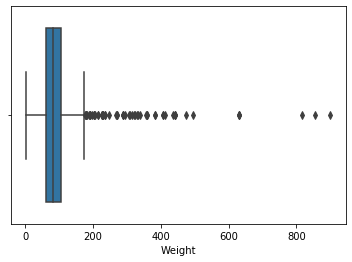

In [36]:
ax = sns.boxplot(x=clean_data["Weight"])

In [37]:
# valores nan substituidos pela mediana
clean_data['Weight'].fillna(clean_data['Weight'].median(), inplace=True)
clean_data_grouped['Weight'].fillna(clean_data_grouped['Weight'].median(), inplace=True)

#### Discretização dos valores numericos para o clean_data_grouped

In [38]:
# personagens com altura maior que 600
gigantes = clean_data_grouped.loc[clean_data_grouped["Height"]>600].copy()
# discretiza os valores dessas alturas
gigantes['Height'] = 5
gigantes

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
230,Fin Fang Foom,Male,red,outros,No Hair,5,Marvel Comics,good,18.0,False,...,False,False,False,False,False,False,False,False,False,False
245,Galactus,Male,Black,outros,Black,5,Marvel Comics,neutral,16.0,False,...,False,False,False,False,False,False,False,False,False,False
270,Groot,Male,yellow,outros,Black,5,Marvel Comics,good,4.0,False,...,False,False,False,False,False,False,False,False,False,False


In [39]:
#personagens com peso maior que 600
obesos = clean_data_grouped.loc[clean_data_grouped["Weight"]>600].copy()
# discretiza o peso
obesos['Weight'] = 6
obesos

,hero_names,Gender,Eye color,Race,Hair color,Height,Publisher,Alignment,Weight,Agility,...,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
180,Darkseid,Male,red,outros,No Hair,267.0,DC Comics,bad,6,True,...,False,False,False,False,False,False,False,False,False,False
254,Giganta,Female,green,Human,Red,62.5,DC Comics,bad,6,False,...,False,False,False,False,False,False,False,False,False,False
294,Hulk,Male,green,outros,outros,244.0,Marvel Comics,good,6,True,...,False,False,False,False,False,False,False,False,False,False
332,Juggernaut,Male,blue,Human,Red,287.0,Marvel Comics,neutral,6,False,...,False,False,False,False,False,False,False,False,False,False
493,Red Hulk,Male,yellow,outros,Black,213.0,Marvel Comics,neutral,6,False,...,False,False,False,False,False,False,False,False,False,False
517,Sasquatch,Male,red,Human,outros,305.0,Marvel Comics,good,6,True,...,False,False,False,False,False,False,False,False,False,False


In [40]:
# os personagens com altura maior que 600 removidos do dataset agrupado
print(clean_data_grouped.shape)
clean_data_grouped.drop(gigantes.index, inplace=True)
clean_data_grouped.shape

(684, 176)


(681, 176)

In [42]:
# discretização da altura dividindo a altura em 4 bins com larguras iguais
labels = [1, 2, 3, 4]
clean_data_grouped["Height"] = pd.cut(clean_data_grouped["Height"], 4, labels=labels)
# adiciona os com altura maior que 600 e label 5
clean_data_grouped = clean_data_grouped.append(gigantes)
clean_data_grouped.shape

(684, 176)

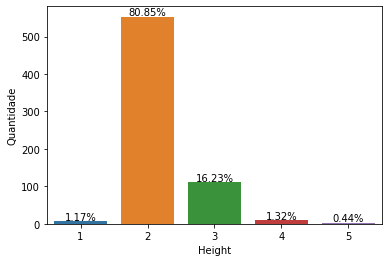

In [43]:
barplot('Height', clean_data_grouped)

In [44]:
# os personagens com peso maior que 600 removidos do dataset agrupado
print(clean_data_grouped.shape)
clean_data_grouped.drop(obesos.index, inplace=True)
clean_data_grouped.shape

(684, 176)


(678, 176)

In [45]:
# discretização da altura dividindo a altura em 5 bins com larguras iguais
labels = [1, 2, 3, 4, 5]
clean_data_grouped["Weight"] = pd.cut(clean_data_grouped["Weight"], 5, labels=labels)
# adiciona os com peso maior que 600 e label 6
clean_data_grouped = clean_data_grouped.append(obesos)
clean_data_grouped.shape

(684, 176)

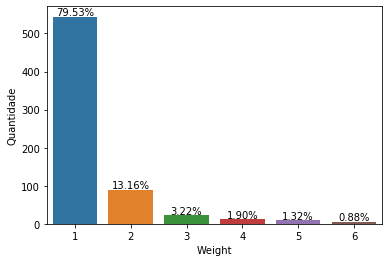

In [46]:
barplot('Weight', clean_data_grouped)

In [47]:
clean_data.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 7 columns):
hero_names    684 non-null object
Gender        642 non-null object
Eye color     684 non-null object
Race          684 non-null object
Hair color    684 non-null object
Publisher     647 non-null object
Alignment     653 non-null object
dtypes: object(7)
memory usage: 37.5+ KB


In [48]:
clean_data_grouped.select_dtypes(include='O').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 684 entries, 0 to 517
Data columns (total 7 columns):
hero_names    684 non-null object
Gender        642 non-null object
Eye color     684 non-null object
Race          684 non-null object
Hair color    684 non-null object
Publisher     647 non-null object
Alignment     653 non-null object
dtypes: object(7)
memory usage: 62.8+ KB


### Gender datasets

In [51]:
clean_data_gender = clean_data.copy()
clean_data_grouped_gender = clean_data_grouped.copy()
# remover valores nan na coluna Gender do dataset
print(clean_data_gender.shape)
clean_data_gender = clean_data_gender.dropna(subset=['Gender'])
clean_data_gender.shape

(684, 176)


(642, 176)

In [52]:
# remover valores nan na coluna Gender do dataset
clean_data_grouped_gender = clean_data_grouped_gender.dropna(subset=['Gender'])
clean_data_grouped_gender.shape

(642, 176)

In [53]:
# para os outros datasets o valor nan de Gender será a moda
clean_data['Gender'].fillna(clean_data['Gender'].mode()[0], inplace=True)
clean_data_grouped['Gender'].fillna(clean_data_grouped['Gender'].mode()[0], inplace=True)

### Publisher dataset

In [54]:
clean_data_publisher = clean_data.copy()
clean_data_grouped_publisher = clean_data_grouped.copy()
# remover valores nan na coluna Publisher do dataset
print(clean_data_publisher.shape)
clean_data_publisher = clean_data_publisher.dropna(subset=['Publisher'])
clean_data_publisher.shape

(684, 176)


(647, 176)

In [55]:
# remover valores nan na coluna Publisher do dataset
clean_data_grouped_publisher = clean_data_grouped_publisher.dropna(subset=['Publisher'])
clean_data_grouped_publisher.shape

(647, 176)

In [56]:
# para os outros datasets o valor nan de Publisher será a moda
clean_data['Publisher'].fillna(clean_data['Publisher'].mode()[0], inplace=True)
clean_data_grouped['Publisher'].fillna(clean_data_grouped['Publisher'].mode()[0], inplace=True)

In [57]:
# para os outros datasets o valor nan de Publisher será a moda
clean_data_gender['Publisher'].fillna(clean_data_gender['Publisher'].mode()[0], inplace=True)
clean_data_grouped_gender['Publisher'].fillna(clean_data_grouped_gender['Publisher'].mode()[0], inplace=True)

### Alignment dataset

In [58]:
clean_data_alignment = clean_data.copy()
clean_data_grouped_alignment = clean_data_grouped.copy()
# remover valores nan na coluna Alignment do dataset
print(clean_data_alignment.shape)
clean_data_alignment = clean_data_alignment.dropna(subset=['Alignment'])
clean_data_alignment.shape

(684, 176)


(653, 176)

In [59]:
# remover valores nan na coluna Alignment do dataset
clean_data_grouped_alignment = clean_data_grouped_alignment.dropna(subset=['Alignment'])
clean_data_grouped_alignment.shape

(653, 176)

In [60]:
# para os outros datasets o valor nan de Alignment será a moda
clean_data['Alignment'].fillna(clean_data['Alignment'].mode()[0], inplace=True)
clean_data_grouped['Alignment'].fillna(clean_data_grouped['Alignment'].mode()[0], inplace=True)

In [61]:
# para os outros datasets o valor nan de Alignment será a moda
clean_data_gender['Alignment'].fillna(clean_data_gender['Alignment'].mode()[0], inplace=True)
clean_data_grouped_gender['Alignment'].fillna(clean_data_grouped_gender['Alignment'].mode()[0], inplace=True)
clean_data_publisher['Alignment'].fillna(clean_data_publisher['Alignment'].mode()[0], inplace=True)
clean_data_grouped_publisher['Alignment'].fillna(clean_data_grouped_publisher['Alignment'].mode()[0], inplace=True)

In [62]:
# não tem mais nenhum nan nos datasets
print(clean_data.isnull().values.any())
print(clean_data_grouped.isnull().values.any())
print(clean_data_gender.isnull().values.any())
print(clean_data_alignment.isnull().values.any())
print(clean_data_publisher.isnull().values.any())
print(clean_data_grouped_gender.isnull().values.any())
print(clean_data_grouped_alignment.isnull().values.any())
print(clean_data_grouped_publisher.isnull().values.any())

False
False
False
False
False
False
False
False


### Lidando com dados categoricos

In [63]:
def preprocessing(data):
    data.drop("hero_names", axis=1, inplace=True)
    data = data.replace(['Male', 'Female'], [0,1])
    #one hot encoding
    data = pd.get_dummies(data)
    return data

In [64]:
print(clean_data.shape)
clean_data = preprocessing(clean_data)
clean_data.shape

(684, 176)


(684, 283)

In [65]:
print(clean_data_grouped.shape)
clean_data_grouped = preprocessing(clean_data_grouped)
clean_data_grouped.shape

(684, 176)


(684, 194)

In [66]:
def preprocessing_publisher(data, label_name):
    data.drop("hero_names", axis=1, inplace=True)
    data = data.replace(['Male', 'Female'], [0,1])
    data = data.replace(['Marvel Comics', 'DC Comics', 'outros'], [3,2,1])
    #one hot encoding
    data = pd.get_dummies(data)
    return data

In [67]:
def preprocessing_alignment(data, label_name):
    data.drop("hero_names", axis=1, inplace=True)
    data = data.replace(['Male', 'Female'], [0,1])
    data = data.replace(['good', 'neutral', 'bad'], [2,1,0])
    # one hot encoding
    data = pd.get_dummies(data)
    return data

In [68]:
print(clean_data_alignment.shape)
clean_data_alignment = preprocessing_alignment(clean_data_alignment, 'Alignment')
clean_data_alignment.shape

(653, 176)


(653, 281)

In [69]:
print(clean_data_grouped_alignment.shape)
clean_data_grouped_alignment = preprocessing_alignment(clean_data_grouped_alignment, 'Alignment')
clean_data_grouped_alignment.shape

(653, 176)


(653, 192)

In [70]:
print(clean_data_publisher.shape)
clean_data_publisher = preprocessing_publisher(clean_data_publisher, 'Publisher')
clean_data_publisher.shape

(647, 176)


(647, 280)

In [72]:
print(clean_data_grouped_publisher.shape)
clean_data_grouped_publisher = preprocessing_publisher(clean_data_grouped_publisher, 'Publisher')
clean_data_grouped_publisher.shape

(647, 176)


(647, 192)

In [73]:
print(clean_data_gender.shape)
clean_data_gender = preprocessing(clean_data_gender)
clean_data_gender.shape

(642, 176)


(642, 278)

In [75]:
print(clean_data_grouped_gender.shape)
clean_data_grouped_gender = preprocessing(clean_data_grouped_gender)
clean_data_grouped_gender.shape

(642, 176)


(642, 194)

In [76]:
# Salvar os datasets
clean_data.to_csv('data/clean_data.csv', index=False)
clean_data_grouped.to_csv('data/clean_data_grouped.csv', index=False)
clean_data_gender.to_csv('data/clean_data_gender.csv', index=False)
clean_data_alignment.to_csv('data/clean_data_alignment.csv', index=False)
clean_data_publisher.to_csv('data/clean_data_publisher.csv', index=False)
clean_data_grouped_gender.to_csv('data/clean_data_grouped_gender.csv', index=False)
clean_data_grouped_alignment.to_csv('data/clean_data_grouped_alignment.csv', index=False)
clean_data_grouped_publisher.to_csv('data/clean_data_grouped_publisher.csv', index=False)

### Barplot labels

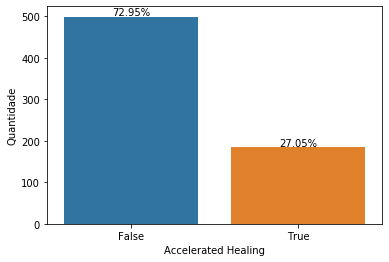

In [77]:
barplot('Accelerated Healing', clean_data)

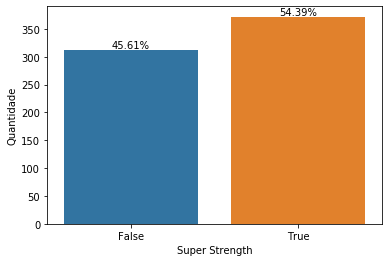

In [78]:
barplot('Super Strength', clean_data)

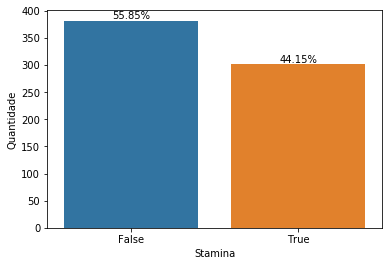

In [79]:
barplot('Stamina', clean_data)

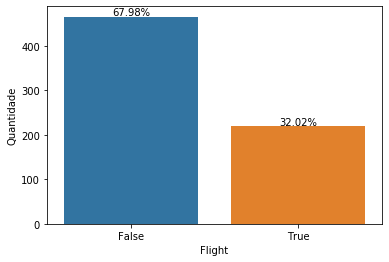

In [80]:
barplot('Flight', clean_data)